# Task 3
Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [4]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

In [6]:
#Reading Dataset
data=pd.read_csv("C:\\Users\Komal\\Downloads\\Task3.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
#Removing unwanted columns from our dataset
data.drop(columns=['day','month','duration','campaign','pdays','previous'],inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
49727,51,technician,married,tertiary,no,825,no,no,cellular,unknown,yes
49728,71,retired,divorced,primary,no,1729,no,no,cellular,unknown,yes
49729,72,retired,married,secondary,no,5715,no,no,cellular,success,yes
49730,57,blue-collar,married,secondary,no,668,no,no,telephone,unknown,no


In [8]:
from sklearn import preprocessing
#Defining LabelEncoder
le=preprocessing.LabelEncoder()
def labelencoderconvert(a):
    #Training our dataset
    le.fit(data[a].values)
    data[a]=le.transform(data[a].values)

labelencoderconvert('job')
labelencoderconvert('marital')
labelencoderconvert('education')
labelencoderconvert('default')
labelencoderconvert('housing')
labelencoderconvert('loan')
labelencoderconvert('contact')
labelencoderconvert('poutcome')
labelencoderconvert('y')
data

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
0,30,10,1,0,0,1787,0,0,0,3,0
1,33,7,1,1,0,4789,1,1,0,0,0
2,35,4,2,2,0,1350,1,0,0,0,0
3,30,4,1,2,0,1476,1,1,2,3,0
4,59,1,1,1,0,0,1,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
49727,51,9,1,2,0,825,0,0,0,3,1
49728,71,5,0,0,0,1729,0,0,0,3,1
49729,72,5,1,1,0,5715,0,0,0,2,1
49730,57,1,1,1,0,668,0,0,1,3,0


## Building a Decision Tree Classifier

In [9]:
X=data.drop(columns=['y'])
Y=data['y']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_prede=dt.predict(x_test)
accuracy = accuracy_score(y_test,y_prede)
print("The accuracy of our model is", accuracy)

The accuracy of our model is 0.8396782841823056


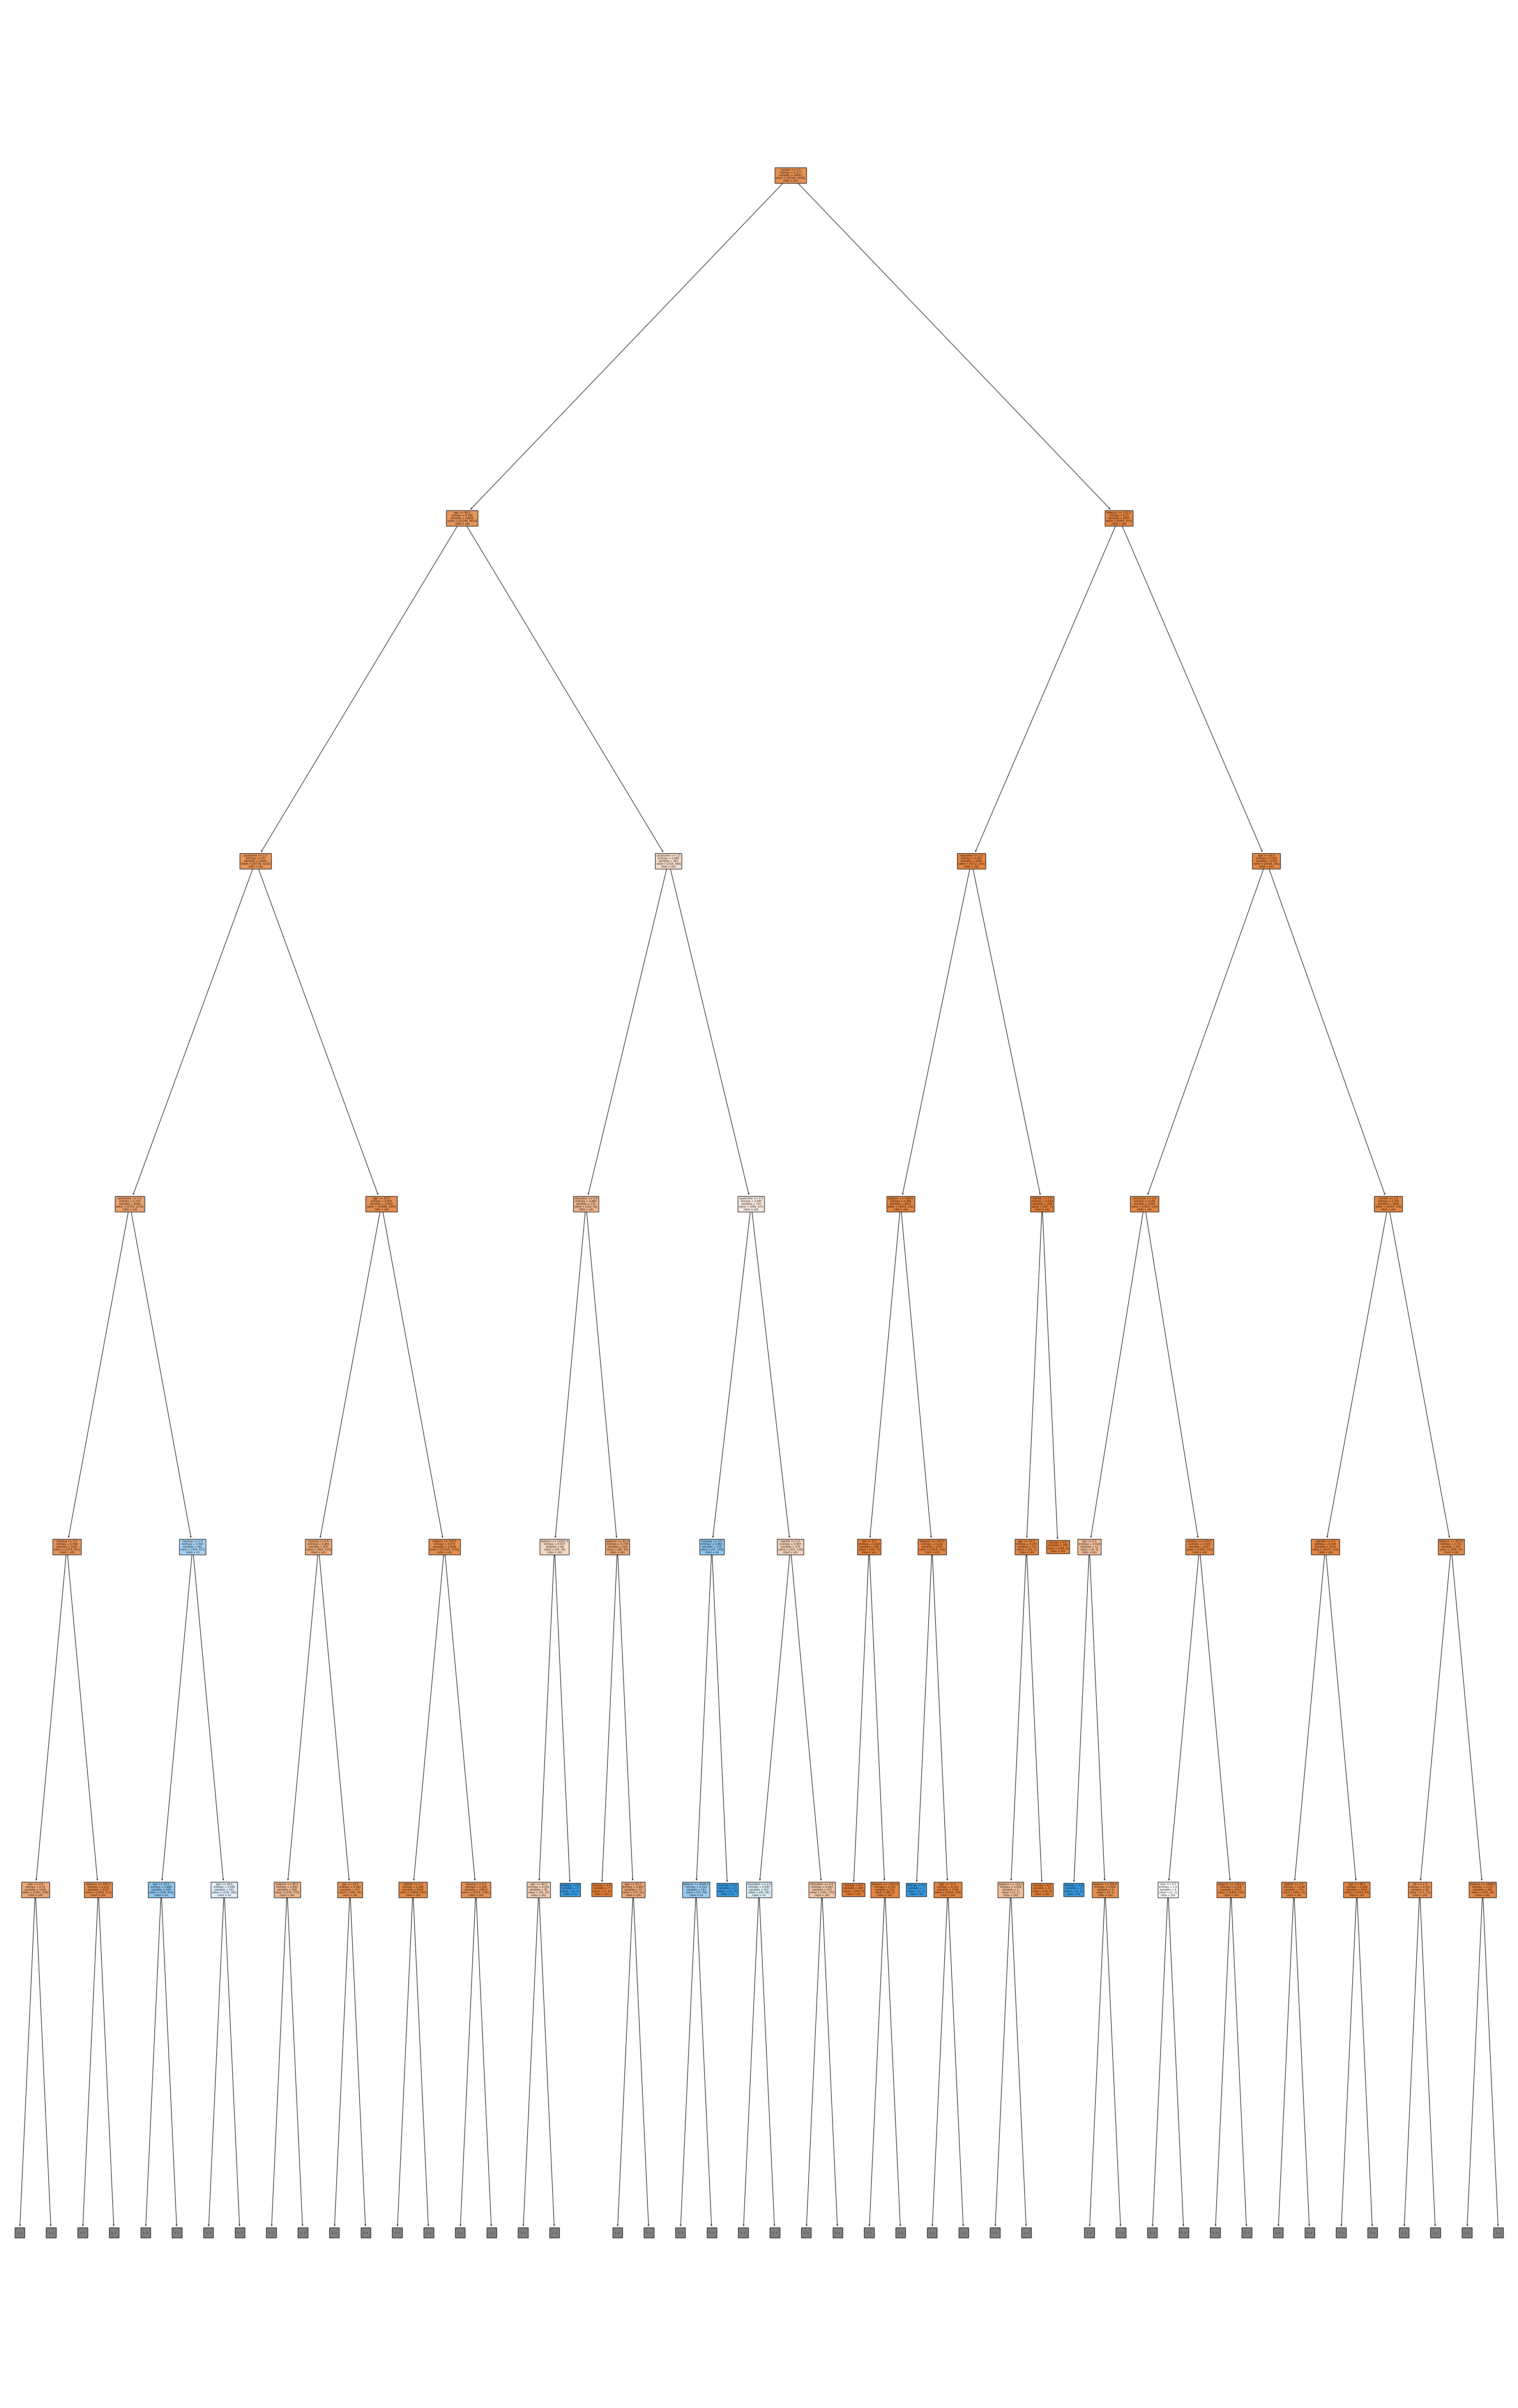

In [11]:
#Visualising our Decision Tree Classifier
plt.figure(figsize=(50,80))
_=plot_tree(dt,max_depth=5,feature_names=X.columns,class_names=['yes','no'],filled=True)